In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import struct
import subprocess
import sys

In [40]:
base_dir = os.getcwd()
exec_dir = '..'

In [41]:
sizes = [1000, 2500, 5000, 7500, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
print(sizes)

[1000, 2500, 5000, 7500, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]


In [42]:
capacities = [100*i for i in range(1, 10+1)] + [2000, 5000]
print(capacities)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 5000]


In [4]:
# Create slices of the original data set.
df = pd.read_csv('{}/data/crash_data.csv'.format(base_dir))
# Shuffle the rows of the original data set.
df = df.sample(frac=1).reset_index(drop=True)
for s in sizes:
    part = df.head(s)
    part.to_csv('{}/test_construction/crash_data_{}.csv'.format(base_dir, s), index=False)

# Construction test 1

First experiment: keep the page capacity constant and change the number of input records. Then measure how the construction time varies.

In [43]:
# Test the implementation.

capacity = 100
ntrials = 20
output_file1 = '{}/test_construction/test_construction.csv'.format(base_dir)

f = open(output_file1, 'w')

os.chdir(exec_dir)

for m in sizes:
    if (m == 0): 
        continue
    print('Testing m={}...'.format(m))
    input_file = "{}/test_construction/crash_data_{}.csv".format(base_dir, m)
    print('Input file: ' + input_file)
    avg = 0
    for i in range(0, ntrials):
        p = subprocess.run(["./TestIndex", input_file, str(capacity)], capture_output=True, check=True)
        lines = p.stdout.decode('utf-8').splitlines()
        avg += int((lines[3].split(':'))[1])
    avg = avg / ntrials
    print(avg)
    f.write('{},{}\n'.format(m, avg))

f.close()

os.chdir(base_dir)

print('Done!')

Testing m=1000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_1000.csv
895.35
Testing m=2500...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_2500.csv
2073.65
Testing m=5000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_5000.csv
4015.5
Testing m=7500...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_7500.csv
5767.3
Testing m=10000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
7774.05
Testing m=20000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_20000.csv
16118.75
Testing m=30000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_30000.csv
23274.85
Testing m=40000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_40000.csv
32030.35
Testing m=50000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_50000.csv
42246.05
Testing m=60000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_60000

In [44]:
# Print the results.
pd.set_option("display.precision", 3)
df1 = pd.read_csv(output_file1, header=None)
df1.columns = ['m', 'time']
df1.sort_values(ascending=True, by='m', inplace=True)
df1['time'] /= 1000
df1

,m,time
0,1000,0.895
1,2500,2.074
2,5000,4.016
3,7500,5.767
4,10000,7.774
5,20000,16.119
6,30000,23.275
7,40000,32.030
8,50000,42.246
9,60000,48.624


In [45]:
print(df1.to_latex(index=False, escape=False))

\begin{tabular}{rr}
\toprule
     m &   time \\
\midrule
  1000 &  0.895 \\
  2500 &  2.074 \\
  5000 &  4.016 \\
  7500 &  5.767 \\
 10000 &  7.774 \\
 20000 & 16.119 \\
 30000 & 23.275 \\
 40000 & 32.030 \\
 50000 & 42.246 \\
 60000 & 48.624 \\
 70000 & 55.698 \\
 80000 & 66.341 \\
 90000 & 73.101 \\
100000 & 80.137 \\
\bottomrule
\end{tabular}



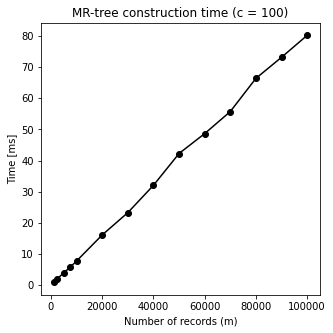

In [46]:
# Generate a plot.
plt.figure(figsize=(5, 5))
plt.title("MR-tree construction time (c = 100)")
plt.plot(df1['m'], df1['time'], marker='o', color='black')
plt.ylabel("Time [ms]")
plt.xlabel("Number of records (m)")
plt.savefig("{}/test_construction/test-construction.eps".format(base_dir), format='eps', bbox_inches='tight')

# Construction test 2

We fix the number of records $m$ and change the capacity $c$.

In [47]:
m = 10000
ntrials = 20
output_file2 = '{}/test_construction/test_construction_capacity.csv'.format(base_dir)

In [48]:
# Test the implementation.

f = open(output_file2, 'w')

os.chdir(exec_dir)

for c in capacities:
    print('Testing c={}...'.format(c))
    input_file = '{}/test_construction/crash_data_{}.csv'.format(base_dir, m)
    print('Input file: ' + input_file)
    avg = 0
    for i in range(0, ntrials):
        p = subprocess.run(['./TestIndex', input_file, str(c)], capture_output=True, check=True)
        lines = p.stdout.decode('utf-8').splitlines()
        avg += int((lines[3].split(':'))[1])
    avg = avg / ntrials
    print(avg)
    f.write('{},{}\n'.format(c, avg))

f.close()

os.chdir(base_dir)
print('Done!')

Testing c=100...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
8085.1
Testing c=200...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
7235.35
Testing c=300...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
8306.35
Testing c=400...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
7970.15
Testing c=500...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
9494.75
Testing c=600...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
7902.85
Testing c=700...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
8014.1
Testing c=800...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
7877.05
Testing c=900...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
7816.0
Testing c=1000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
8336.75
Te

In [33]:
# Print the results.
pd.set_option("display.precision", 3)
df2 = pd.read_csv(output_file2, header=None)
columns = ['c', 'time']
df2.columns = columns
df2.sort_values(ascending=True, by='c', inplace=True)
df2['time'] /= 1000
df2

,c,time
0,100,7.681
1,200,7.485
2,300,8.366
3,400,8.311
4,500,8.167
5,600,8.236
6,700,8.075
7,800,8.126
8,900,7.922
9,1000,8.406


In [34]:
print(df2.to_latex(index=False, escape=False))

\begin{tabular}{rr}
\toprule
   c &  time \\
\midrule
 100 & 7.681 \\
 200 & 7.485 \\
 300 & 8.366 \\
 400 & 8.311 \\
 500 & 8.167 \\
 600 & 8.236 \\
 700 & 8.075 \\
 800 & 8.126 \\
 900 & 7.922 \\
1000 & 8.406 \\
2000 & 7.745 \\
5000 & 7.911 \\
\bottomrule
\end{tabular}



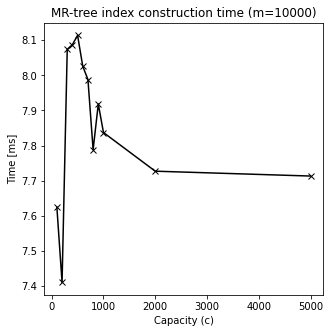

In [26]:
# Generate a plot.
plt.figure(figsize=(5, 5))
plt.title("MR-tree index construction time (m={})".format(m))
plt.plot(df2['c'], df2['time'], marker='x', color='black')
plt.ylabel("Time [ms]")
plt.xlabel("Capacity (c)")
plt.savefig("{}/test_construction/test-construction-capacity.eps".format(base_dir), format='eps', bbox_inches='tight')